In [21]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

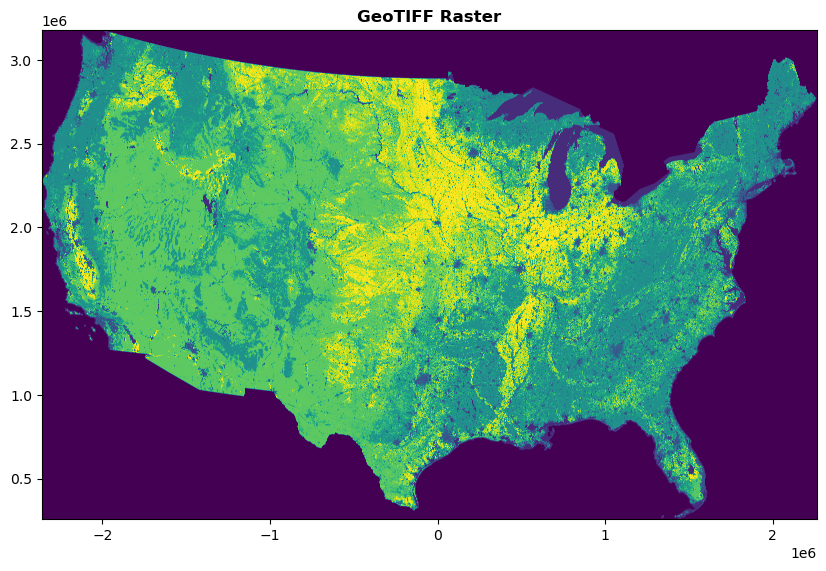

In [24]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# File path to your GeoTIFF file
geotiff_path = '/Users/mihiarc/Work/geodata-econ/rpa-landuse-proj/data/spatial-proj/output_file.tif'


# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, ax=ax, title='GeoTIFF Raster')

# Display the plot
plt.show()

In [26]:
import rasterio

# File path to your GeoTIFF file
geotiff_path = '/Users/mihiarc/Work/geodata-econ/rpa-landuse-proj/data/spatial-proj/output_file.tif'

# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    # Print metadata
    print("Metadata:")
    print(src.meta)
    
    # Read the first band
    band1 = src.read(1)
    
    # Print some pixel values
    print("\nPixel values (sample):")
    print(band1)

# Example: To print the value of a specific pixel, you can access it directly
# For instance, the value at row 100, column 100
specific_pixel_value = band1[100, 100]
print(f"\nValue of pixel at row 100, column 100: {specific_pixel_value}")

Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 51393, 'height': 32426, 'count': 1, 'crs': CRS.from_epsg(5070), 'transform': Affine(90.0, 0.0, -2361582.27557537,
       0.0, -90.0, 3177424.96556934)}

Pixel values (sample):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Value of pixel at row 100, column 100: 0


In [11]:


# Define the file paths for the ENVI files
bin_file_path = '/Users/mihiarc/Work/geodata-econ/rpa-landuse-proj/data/spatial-proj/2030_Projected_LU_Scenario_NorESM1_M_rcp85_ssp5_Seed_102_Case_12_FIPS_Full_CONUS_Byte'
hdr_file_path = '/Users/mihiarc/Work/geodata-econ/rpa-landuse-proj/data/spatial-proj/2030_Projected_LU_Scenario_NorESM1_M_rcp85_ssp5_Seed_102_Case_12_FIPS_Full_CONUS_Byte.hdr'

# Read the header file to extract metadata
def read_envi_header(hdr_file):
    metadata = {}
    with open(hdr_file, 'r') as f:
        for line in f:
            if '=' in line:
                key, value = line.split('=')
                key = key.strip()
                value = value.strip().strip('{}').strip()
                metadata[key] = value
    return metadata

header = read_envi_header(hdr_file_path)
header


{'description': '',
 'samples': '51393',
 'lines': '32426',
 'bands': '1',
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '1',
 'interleave': 'bsq',
 'byte order': '0',
 'map info': 'Albers Conical Equal Area, 1, 1, -2361582.27557537, 3177424.96556934, 90, 90,North America 1983',
 'projection info': '9, 6378137, 6356752.314140356, 23, -96, 0, 0, 29.5, 45.5,North America 1983, Albers Conical Equal Area',
 'coordinate system string': 'PROJCS["Albers",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Albers"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_origin",23],PARAMETER["central_meridian",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]',
 'band names': ''}

In [8]:
# Parsing header info
samples = int(header['samples'])
lines = int(header['lines'])
bands = int(header['bands'])
data_type = int(header['data type'])
byte_order = int(header['byte order'])
map_info = header['map info'].split(',')
x_min = float(map_info[3])
y_max = float(map_info[4])
pixel_size = float(map_info[5])

In [10]:
# Determine data type
data_type_map = {
    1: np.uint8,
    2: np.int16,
    3: np.int32,
    4: np.float32,
    5: np.float64,
    12: np.uint16,
    13: np.uint32,
    14: np.int64,
    15: np.uint64
}
dtype = data_type_map[data_type]
dtype

numpy.uint8

In [23]:
# Read binary raster data
raster_data = np.fromfile(bin_file_path, dtype=dtype)
raster_data = raster_data.reshape((nbands, nrows, ncols))
raster_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

TypeError: Invalid shape (1, 32426, 51393) for image data

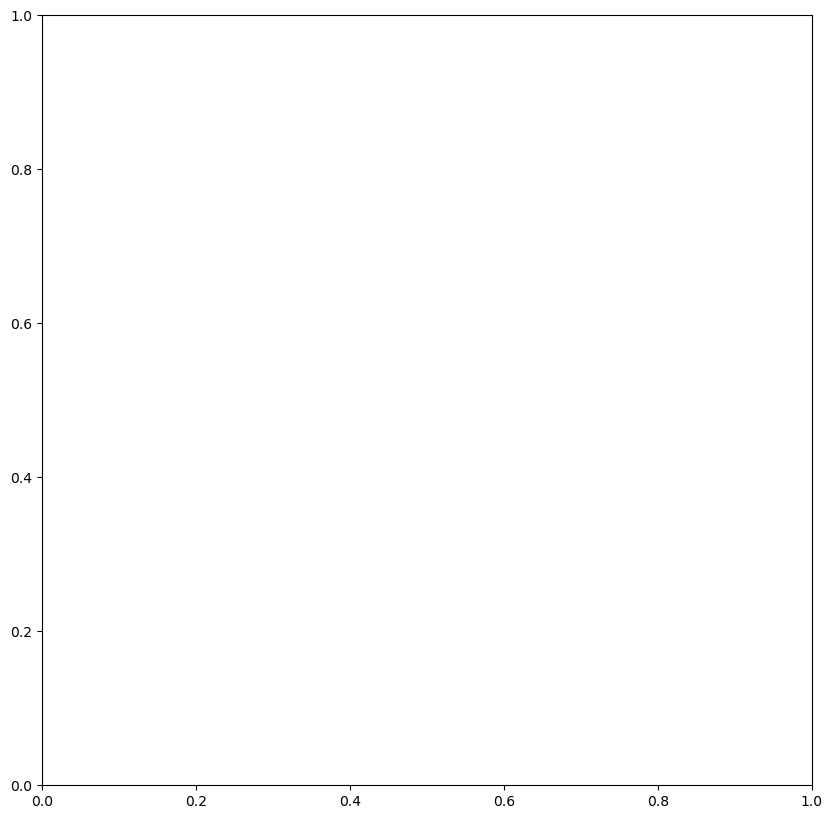

In [22]:
# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='gray')
plt.title('Raster Data')
plt.colorbar()
plt.show()

In [18]:
# GeoTIFF transform and metadata
transform = rasterio.transform.from_origin(x_min, y_max, pixel_size, pixel_size)
crs = header['coordinate system string']

In [19]:
# Write to GeoTIFF
with rasterio.open(
    'output.tif', 'w',
    driver='GTiff',
    height=lines,
    width=samples,
    count=bands,
    dtype=dtype,
    crs=crs,
    transform=transform
) as dst:
    dst.write(raster_data, 1)

print("Conversion to GeoTIFF completed successfully.")

ValueError: Source shape (1, 1, 32426, 51393) is inconsistent with given indexes 1

In [5]:
with MemoryFile() as memfile:
    with memfile.open(**profile) as dataset:
        for i in range(1, nbands + 1):
            dataset.write(data[i - 1], i)
        dataset.close()

    # Read the raster back from the MemoryFile
    with memfile.open() as dataset:
        raster_layer = dataset.read(1)

# Display the raster using geemap
Map = geemap.Map(center=[35.5, -79], zoom=7)  # Central North Carolina coordinates
Map.add_raster(memfile.name, name='ENVI Raster')
Map.add_layer_control()
Map

TypeError: data type '' not understood